## Demo Project: Introduction to pm4py

This jupyter notebook serves as a gentle introduction to the application of some of the process mining concepts from the **BridgingAI Process Mining** course. 

In the following, we utilize the package `pm4py` to analyze a given **object-centric** event log (`ecommerce_cleaned.sqlite`). You can find the documentation of the package [here](https://processintelligence.solutions/static/api/2.7.11/pm4py.html). This notebook shows an exemplary workflow with many hands-on examples of the provided data structures and methods.

In [1]:
# Necessary imports for the remainder of the notebook
import pm4py
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn', suppress warnings when importing logs from https://www.ocel-standard.org/event-logs/

---

### 1. Importing the event log from a file

The first step requires us to load the object-centric event log from the file as an OCEL data structure (given by the pm4py library). By printing the data structure, we get a first overview of the event log.

In [3]:
# Overview of given object centric event log
ocel = pm4py.read_ocel2_sqlite("./event-logs/ecommerce_cleaned.sqlite")
print(f'\n{ocel}')

/Users/yuyang/Documents/课件/BPDI/Thesis/edx course/subtitle/.venv/lib/python3.12/site-packages/pm4py/objects/ocel/importer/sqlite/variants/ocel20.py:98: UserWarning: There are unsatisfied OCEL 2.0 constraints in the given relational database: ['const_14_primary_key_object_event_map_type_tables', 'const_15_primary_key_object_event_tables', 'const_16_primary_key_event_object_table', 'const_17_primary_key_object_object_table', 'const_18_primary_key_event_type_spec_tables', 'const_19_foreign_key_event', 'const_20_foreign_key_object', 'const_21_foreign_key_event_object', 'const_22_foreign_key_object_object', 'const_23_foreign_key_event_type_specific', 'const_24_foreign_key_object_type_specific']
  warnings.warn(



Object-Centric Event Log (number of events: 14066, number of objects: 6574, number of activities: 16, number of object types: 4, events-objects relationships: 35592)
Activities occurrences: Counter({'add item': 3998, 'logout': 1247, 'login': 1118, 'register': 1118, 'prepare delivery': 729, 'create order': 717, 'place order': 717, 'select shipping': 717, 'send invoice': 717, 'pay': 572, 'confirm payment': 572, 'give to carrier': 511, 'carrier confirms': 489, 'delivered': 417, 'delivery': 417, 'cancel order': 10})
Object types occurrences (number of objects): Counter({'item': 4010, 'customer': 1118, 'package': 729, 'order': 717})
Unique activities per object type: Counter({'order': 13, 'customer': 12, 'item': 6, 'package': 5})
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


/Users/yuyang/Documents/课件/BPDI/Thesis/edx course/subtitle/.venv/lib/python3.12/site-packages/pm4py/objects/ocel/util/ocel_consistency.py:120: UserWarning: The object identifiers in the OCEL are not unique!
  warnings.warn("The object identifiers in the OCEL are not unique!")


---

### 2. Exploring the event log

The OCEL data structure also contains further internal data structures that store events, objects, and relations. In the following, we provide a brief overview of each by printing their first ten entries respectively. Additionally, the OCEL data structure provides some methods to get a quick overview of the imported log. We introduce some of the methods subsequently.

##### 2.1. Events

Firstly, we print the ten first events of the 'events' sub-table, which can be seen as a simplified version of the OCEL.

In [4]:
# Overview of events
ocel.events.head(10)

ocel:eid            ocel:timestamp option method ocel:activity
0     login1 2022-01-03 00:00:00+00:00    NaN    NaN         login
0  register1 2022-01-03 00:00:00+00:00    NaN    NaN      register
0    logout1 2022-01-03 00:05:00+00:00    NaN    NaN        logout
1     login2 2022-01-05 20:10:00+00:00    NaN    NaN         login
1  register2 2022-01-05 20:10:00+00:00    NaN    NaN      register
1    logout2 2022-01-05 20:18:00+00:00    NaN    NaN        logout
2     login3 2022-01-07 20:08:00+00:00    NaN    NaN         login
2  register3 2022-01-07 20:08:00+00:00    NaN    NaN      register
2    logout3 2022-01-07 20:14:00+00:00    NaN    NaN        logout
3     login4 2022-01-07 20:21:00+00:00    NaN    NaN         login

The prior events table is a pandas dataframe. In the following, we show one simple way to access the values of an individual column and count all possible values of that column. Here, we want to discover what possible options an event can have.

In [5]:
# Get more details about individual options (here: count which options are avaliable and how often they appear)

df_event_options = ocel.events.value_counts(subset='option', dropna=False)
print(f'For the \'option\' column of the events table, there are following values with the respective number of occurrences:\n\n{df_event_options}')

For the 'option' column of the events table, there are following values with the respective number of occurrences:

option
NaN       11203
normal     2252
fast        611
Name: count, dtype: int64


##### 2.2. Objects

Working with object-centric event logs, we can also view the 'objects' sub-table to get more information about all the objects that are contained by the process.

In [6]:
# Overview of objects
ocel.objects.head(10)

ocel:oid  gender  year of birth  country type  price ocel:type
0   customer1    Male         2000.0    Spain  NaN    NaN  customer
1   customer2    Male         1989.0   France  NaN    NaN  customer
2   customer3  Female         1996.0  Germany  NaN    NaN  customer
3   customer4  Female         1995.0  Belgium  NaN    NaN  customer
4   customer5    Male         1994.0    Spain  NaN    NaN  customer
5   customer6    Male         1991.0  Romania  NaN    NaN  customer
6   customer7    Male         1989.0    Italy  NaN    NaN  customer
7   customer8    Male         1988.0   France  NaN    NaN  customer
8   customer9    Male         1990.0   Poland  NaN    NaN  customer
9  customer10  Female         1994.0    Spain  NaN    NaN  customer

Similar to our previous count of event options, there are some predefined methods in the `pm4py` package to access certain high-level information quickly.

In [7]:
object_types = pm4py.ocel_get_object_types(ocel)
print(f'The following types of objects are contained in the log: {object_types}\n')

The following types of objects are contained in the log: ['customer', 'item', 'order', 'package']



---

### 3. Computations with event log data

Let us take a more in-depth guide into the given object-centric event log. For that, we will convert the OCEL to a pandas dataframe and print the dataframe.

In [9]:
# Convert the OCEL object to a pandas dataframe - the method .to_markdown() is only used for pretty formatting
ocel_df = ocel.get_extended_table()
print(ocel_df.to_markdown())

|       | ocel:eid           | ocel:timestamp            | option   | method   | ocel:activity    | ocel:type:customer   | ocel:type:order   | ocel:type:item                                                                                                           | ocel:type:package   |
|------:|:-------------------|:--------------------------|:---------|:---------|:-----------------|:---------------------|:------------------|:-------------------------------------------------------------------------------------------------------------------------|:--------------------|
|     0 | login1             | 2022-01-03 00:00:00+00:00 | nan      | nan      | login            | ['customer1']        | nan               | nan                                                                                                                      | nan                 |
|     1 | register1          | 2022-01-03 00:00:00+00:00 | nan      | nan      | register         | ['customer1']        | nan          

Let us use the previously collected information on how information is stored from the OCEL by `pm4py` together with some pandas dataframe operations to answer some more elaborate tasks. In the OCEL, we have seen that activites may relate to some items (stored as a list in the `ocel:type:item` column).

Firstly, we extract the ten activites with the most related items to the event. Subsequently, we determine the event that contains the most items. For this event, we find the corresponding activity of the event and which items it relates to.

In [10]:
# For the 10 events with most related items, print the respective activity and how many items are involved

# Create a dataframe with only an Activity column and the corresponding number of items in an ItemCount column
ocel_s_itemcounts = ocel_df['ocel:type:item'].str.len()
ocel_df_events_itemcounts = pd.concat([ocel_df['ocel:activity'], ocel_s_itemcounts], axis=1)
ocel_df_events_itemcounts.rename(columns={'ocel:activity': 'Activity', 'ocel:type:item': 'ItemCount'}, inplace=True)
ocel_df_events_itemcounts.sort_values(by=['ItemCount'], ascending=False, inplace=True)
print(f'The ten events related to most objects:\n\n{ocel_df_events_itemcounts.head(10).to_markdown()}\n')

# For the event that involves the most items, print which items are involved
ls_involved_items = ocel_df.loc[ocel_df_events_itemcounts.index[0]]['ocel:type:item']
ls_item_names = []

for item in ls_involved_items:
    ls_item_names.append(ocel.objects[ocel.objects['ocel:oid'] == item]['type'].values[0])

most_items_activity_name = ocel_df_events_itemcounts.iloc[0]['Activity']
fancy_item_names = ', '.join(ls_item_names[:-1]) + ' and ' + ls_item_names[-1]
print(f'The activity related to most items is a {most_items_activity_name}, which relates to {fancy_item_names}.')

The ten events related to most objects:

|       | Activity         |   ItemCount |
|------:|:-----------------|------------:|
|  6521 | give to carrier  |          10 |
|  3513 | delivered        |          10 |
|  8767 | delivery         |          10 |
|  8768 | delivered        |          10 |
|  6318 | prepare delivery |          10 |
| 13847 | prepare delivery |          10 |
|  2081 | give to carrier  |          10 |
|  6558 | carrier confirms |          10 |
| 14048 | carrier confirms |          10 |
|  3514 | delivery         |          10 |

The activity related to most items is a give to carrier, which relates to Camera Bag, Camera, Swimwear, Headphones, Umbrella, Sneakers, Laptop, Jeans, Jeans and Sneakers.


---

### 4. Relations between objects and events, and objects with other objects

Each event may be related to a variable number of objects, for example, 'add item' events hold the information which customer adds which item to which order. Thus, each event of the activity type 'add item' relates to those different object types. Furthermore, this event also creates a relationship between the individual objects that are related to the order. Relations between objects and events, as well as between objects and other objects, can be extracted from the OCEL.

##### 4.1. Event-to-object relationships

The sub-table that holds information about the event-to-object relations is called `relations`. Here, we can see which events are related to which objects.

In [11]:
# Overview of event-to-object relations
ocel.relations.head(10)

ocel:eid   ocel:oid ocel:qualifier ocel:activity  \
0  register1  customer1           None      register   
1     login1  customer1           None         login   
2    logout1  customer1           None        logout   
3  register2  customer2           None      register   
4     login2  customer2           None         login   
5    logout2  customer2           None        logout   
6  register3  customer3           None      register   
7     login3  customer3           None         login   
8    logout3  customer3           None        logout   
9  register4  customer4           None      register   

             ocel:timestamp ocel:type  
0 2022-01-03 00:00:00+00:00  customer  
1 2022-01-03 00:00:00+00:00  customer  
2 2022-01-03 00:05:00+00:00  customer  
3 2022-01-05 20:10:00+00:00  customer  
4 2022-01-05 20:10:00+00:00  customer  
5 2022-01-05 20:18:00+00:00  customer  
6 2022-01-07 20:08:00+00:00  customer  
7 2022-01-07 20:08:00+00:00  customer  
8 2022-01-07 20:14:00+00:00  customer  
9 2022-01-07 20:21:00+00:00  customer

Each row corresponds to the relation between one event and one object. Thus, we can determine which objects participate in the most events by counting occurrences of object IDs and looking at the most frequent ones.

In [13]:
df_object_counts = ocel.relations.value_counts(subset='ocel:oid', dropna=False)
df_object_counts.head(10)

ocel:oid
customer7      43
customer26     42
order138       42
customer120    39
order107       39
order92        37
order52        37
order234       37
order12        36
customer8      36
Name: count, dtype: int64

##### 4.2 Object-to-object relationships

Relations between objects can be added to the OCEL in various ways. The package `pm4py` requires us to first discover an objects graph and afterwards call the method `ocel_o2o_enrichments()` with the object-centric event log to create the `o2o` sub-table that contains the objects-to-objects relations derived from the corresponding graphs that are used to determine the object relations. Other objects-to-objects may be statically set in the OCEL. In our [example log](https://www.ocel-standard.org/event-logs/simulations/order-management/), 'primarySalesRep' and 'secondarySalesRep' are examples for this. Such predefined relations provide additional organizational information.

In [14]:
ocel_enriched = pm4py.read_ocel2_sqlite("./event-logs/order-management.sqlite") # From https://www.ocel-standard.org/event-logs/simulations/order-management/
obj_graph= pm4py.discover_objects_graph(ocel_enriched, graph_type='object_interaction')
ocel_enriched = pm4py.ocel_o2o_enrichment(ocel_enriched, obj_graph)

# Overview of object-to-object relations
print(f"\n{ocel_enriched.o2o.head(10)}\n\n")

# Number of types of relations between individual objects
print(ocel_enriched.o2o['ocel:qualifier'].value_counts())

/Users/yuyang/Documents/课件/BPDI/Thesis/edx course/subtitle/.venv/lib/python3.12/site-packages/pm4py/objects/ocel/importer/sqlite/variants/ocel20.py:98: UserWarning: There are unsatisfied OCEL 2.0 constraints in the given relational database: ['const_14_primary_key_object_event_map_type_tables', 'const_15_primary_key_object_event_tables', 'const_16_primary_key_event_object_table', 'const_17_primary_key_object_object_table', 'const_18_primary_key_event_type_spec_tables', 'const_19_foreign_key_event', 'const_20_foreign_key_object', 'const_21_foreign_key_event_object', 'const_22_foreign_key_object_object', 'const_23_foreign_key_event_type_specific', 'const_24_foreign_key_object_type_specific']
  warnings.warn(



                            ocel:oid             ocel:oid_2     ocel:qualifier
0          Danube Pharmaceuticals BV  Christine von Dobbert    primarySalesRep
1          Danube Pharmaceuticals BV          Mara Nitschke  secondarySalesRep
2  Carpathian Financial Services plc       Jan Niklas Adams    primarySalesRep
3  Carpathian Financial Services plc           Istvan Koren  secondarySalesRep
4           AlpenTech Innovations AG      Wil van der Aalst    primarySalesRep
5           AlpenTech Innovations AG           Istvan Koren  secondarySalesRep
6             Balkan Minerals d.o.o.  Christine von Dobbert    primarySalesRep
7             Balkan Minerals d.o.o.          Mara Nitschke  secondarySalesRep
8               Riviera Robotics SAS           Istvan Koren    primarySalesRep
9               Riviera Robotics SAS  Christine von Dobbert  secondarySalesRep


ocel:qualifier
comprises            7659
is a                 7659
contains             7659
places               2000
packed by

---

### 5. Filtering the event log

Our current OCEL log is very large and makes it difficult to see individual relations between events. For example, we might only care about events corresponding to the 'login' and 'logout' activity names.

##### 5.1. Filtering by activity names

Here, filtering can be used to remove all events from the OCEL log that are not specified in the input list of activity names for the filtering function. Again, we can obtain an overview by printing the filtered OCEL and take a deep dive into the event log by converting the OCEL into a pandas dataframe.

In [15]:
ocel_filtered_activities = pm4py.algo.filtering.ocel.event_attributes.apply(ocel, ['login', 'logout'])
print(f"{ocel_filtered_activities}\n")
print(ocel_filtered_activities.get_extended_table().to_markdown())

Object-Centric Event Log (number of events: 2365, number of objects: 1118, number of activities: 2, number of object types: 1, events-objects relationships: 2365)
Activities occurrences: Counter({'logout': 1247, 'login': 1118})
Object types occurrences (number of objects): Counter({'customer': 1118})
Unique activities per object type: Counter({'customer': 2})
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.

|      | ocel:eid   | ocel:timestamp            |   option |   method | ocel:activity   | ocel:type:customer   |
|-----:|:-----------|:--------------------------|---------:|---------:|:----------------|:---------------------|
|    0 | login1     | 2022-01-03 00:00:00+00:00 |      nan |      nan | login           | ['customer1']        |
|    1 | logout1    | 2022-01-03 00:05:00+00:00 |      nan |      nan | logout          | ['customer1']        |
|    2 | login2     | 2022-01-05 20:10:00+00:00 |      nan |      nan | lo

Analyzing the output of the OCEL, we quickly see that the OCEL contains 1247 logout occurrences, but only 1118 login occurrences with 1118 unique customers. The surplus of logout occurrences clearly indicates that there are problems with the expected login and logout behaviour. Further analysis of the corresponding log might give valuable insights into uncovering the source of such problems, which we were able to discover from the filtered event log.

##### 5.2. Filtering by object types

Alternatively, we can also filter the OCEL by object types. Here, we specify the list of object types that we want to keep in the OCEL. For example, we may only be interested in events that are related to objects of the type 'item' or 'package'. Of course, both filtering methods can also be combined by executing the filtering function on an already filtered OCEL.

In [16]:
ocel_filtered_objects = pm4py.algo.filtering.ocel.object_attributes.apply(ocel, ['package', 'item'])
print(f"{ocel_filtered_objects}\n\n")

ocel_filtered_objects_activities = pm4py.algo.filtering.ocel.event_attributes.apply(ocel_filtered_objects, ['add item', 'prepare delivery', 'carrier confirms', 'delivered'])
print(f"{ocel_filtered_objects_activities}\n\n")
print(ocel_filtered_objects_activities.get_extended_table().to_markdown())

Object-Centric Event Log (number of events: 6561, number of objects: 4739, number of activities: 6, number of object types: 2, events-objects relationships: 13089)
Activities occurrences: Counter({'add item': 3998, 'prepare delivery': 729, 'give to carrier': 511, 'carrier confirms': 489, 'delivered': 417, 'delivery': 417})
Object types occurrences (number of objects): Counter({'item': 4010, 'package': 729})
Unique activities per object type: Counter({'item': 6, 'package': 5})
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


Object-Centric Event Log (number of events: 5633, number of objects: 4739, number of activities: 4, number of object types: 2, events-objects relationships: 9795)
Activities occurrences: Counter({'add item': 3998, 'prepare delivery': 729, 'carrier confirms': 489, 'delivered': 417})
Object types occurrences (number of objects): Counter({'item': 4010, 'package': 729})
Unique activities per object type: Co

---

### 6. Discovery

To understand the process behind an event log quickly, it is important to visualize the process appropriately. In the lectures, you have already learned about DFGs and petri nets and how to obtain these graphical representations from an event log. In the following, we focus on the object-centric versions. The `pm4py` package provides simple methods to discover such object-centric DFGs and object-centric petri nets.

##### 6.1 Object-centric directly follows graphs

When discovering the OCDFG, we can further specify a threshold to only consider activities that occur a specific minimal number of times. The resulting graph can be shown using the corresponding 'view' function.

/Users/yuyang/Documents/课件/BPDI/Thesis/edx course/subtitle/.venv/lib/python3.12/site-packages/pm4py/objects/ocel/importer/sqlite/variants/ocel20.py:98: UserWarning: There are unsatisfied OCEL 2.0 constraints in the given relational database: ['const_23_foreign_key_event_type_specific']
  warnings.warn(


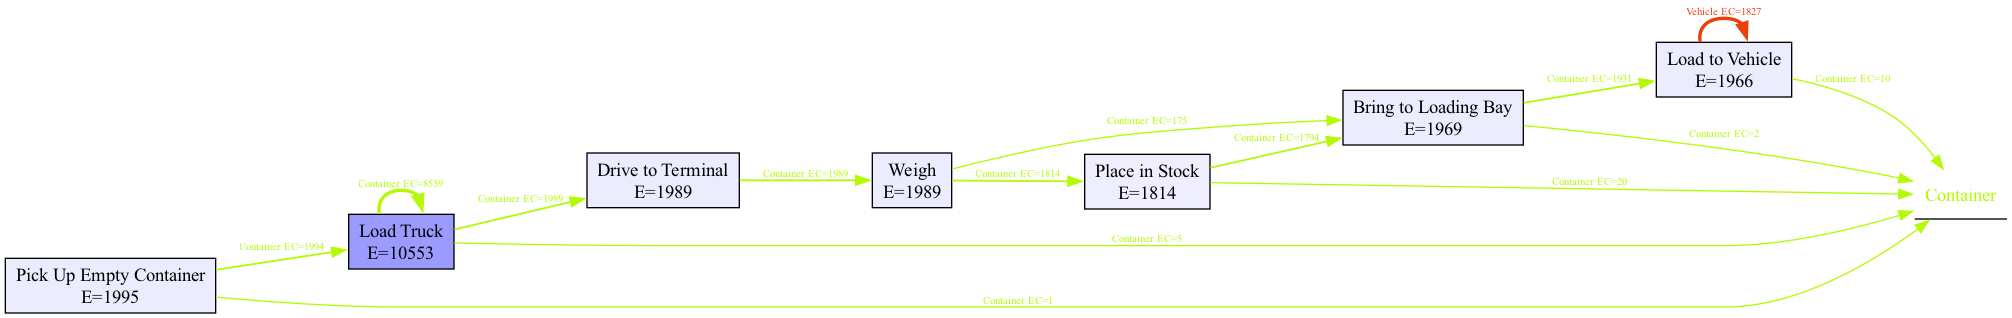

In [17]:
# OCDFG
ocel_2 = pm4py.read_ocel2_sqlite("./event-logs/logistics.sqlite") # From https://www.ocel-standard.org/event-logs/simulations/logistics/

ocdfg = pm4py.discover_ocdfg(ocel_2)
pm4py.view_ocdfg(ocdfg, act_threshold = 800) # act_threshold sets the minimum required frequency for an activity to be included in the graph visualization

##### 6.2. Object-centric petri nets

To prevent confusing spaghetti nets, we can filter the OCEL prior to creating the object-centric petri net. In the following, we exclude the activities 'Order Empty Containers', 'Pick Up Empty Containers' and 'Load Truck' before creating the OCPN.

In [ ]:
# OCPN
# filter out all activities 'Order Empty Containers', 'Pick Up Empty Containers', 'Load Truck' from the ocel prior to creating the OCPN
filtered_ocel_2_activities = pm4py.algo.filtering.ocel.event_attributes.apply(ocel_2, ['Order Empty Containers', 'Pick Up Empty Containers', 'Load Truck'], {'positive': False})

ocpn = pm4py.discover_oc_petri_net(filtered_ocel_2_activities)
pm4py.view_ocpn(ocpn)

---

### 7. Flattening

In the lecture, you have already learned how flattening can be used to transfom an object-centric event log to a case-centric event log that uses a given object type as the case notion. Flattening is particularly useful, as it allows us to apply case-centric operations to the flattened event logs. In the following, we extract flattened event logs from an OCEL, explore some case-centric statistical information for the flattened logs, and discover process models for the flattened logs.

##### 7.1. From OCEL to flattened log

The `ocel_flatteing()` function creates a flattened event log with the provided object type as its case notation.

In [18]:
# Flatten by different object types
event_log_customer = pm4py.ocel_flattening(ocel, 'customer')
event_log_order = pm4py.ocel_flattening(ocel, 'order')
event_log_package = pm4py.ocel_flattening(ocel, 'package')
event_log_item = pm4py.ocel_flattening(ocel, 'item')

print(event_log_customer.to_markdown())

|       | ocel:eid          | time:timestamp            | option   | method   | concept:name    | case:concept:name   | case:gender   |   case:year of birth | case:country   |   case:type |   case:price | case:ocel:type   |
|------:|:------------------|:--------------------------|:---------|:---------|:----------------|:--------------------|:--------------|---------------------:|:---------------|------------:|-------------:|:-----------------|
|     0 | login1            | 2022-01-03 00:00:00+00:00 | nan      | nan      | login           | customer1           | Male          |                 2000 | Spain          |         nan |          nan | customer         |
|     1 | register1         | 2022-01-03 00:00:00+00:00 | nan      | nan      | register        | customer1           | Male          |                 2000 | Spain          |         nan |          nan | customer         |
|     2 | logout1           | 2022-01-03 00:05:00+00:00 | nan      | nan      | logout          | custom

##### 7.2. Variant frequency

The stochastic language of a case-centric event log contains all variants of event executions for the given case with the corresponding probability of the variant appearing. In the following, we print all variants obtained from the stochastic language sorted by descending frequency of the corresponding variant. This information allows us to understand which variants are the most common and which variants are potentially corner cases.

In [19]:
# pretty print for the dictionary that contains the stochastic language
def pretty(d, indent=0):
   for key, value in d.items():
      print('\t' * indent + 'variant: ' + str(key))
      if isinstance(value, dict):
         pretty(value, indent+1)
      else:
         print('\t' * (indent+1) + 'probability: ' + str(value))

stochastic_language = pm4py.statistics.variants.log.get.get_language(event_log_package)
stochastic_language_sorted = dict(sorted(stochastic_language.items(), key=lambda item: item[1], reverse = True))
pretty(stochastic_language_sorted)

variant: ('prepare delivery', 'give to carrier', 'carrier confirms', 'delivered', 'delivery')
	probability: 0.4840499306518724
variant: ('prepare delivery',)
	probability: 0.29958391123439665
variant: ('prepare delivery', 'give to carrier', 'carrier confirms')
	probability: 0.0970873786407767
variant: ('prepare delivery', 'give to carrier', 'carrier confirms', 'delivery', 'delivered')
	probability: 0.06796116504854369
variant: ('prepare delivery', 'give to carrier')
	probability: 0.030513176144244106
variant: ('prepare delivery', 'carrier confirms', 'give to carrier', 'delivered', 'delivery')
	probability: 0.008321775312066574
variant: ('prepare delivery', 'prepare delivery', 'prepare delivery', 'prepare delivery', 'give to carrier', 'give to carrier', 'give to carrier', 'give to carrier', 'carrier confirms', 'carrier confirms', 'carrier confirms', 'carrier confirms', 'delivered', 'delivered', 'delivery', 'delivery', 'delivered', 'delivered', 'delivery', 'delivery')
	probability: 0.004

##### 7.3. Flattened discovery

You have learned about many useful discovery algorithms for case-centric event logs in the lecture. Flattening the object-centric event logs allows us to apply these various discovery algorithms. In the following, we show how to apply the alpha miner and inductive miner to our flattened event logs.

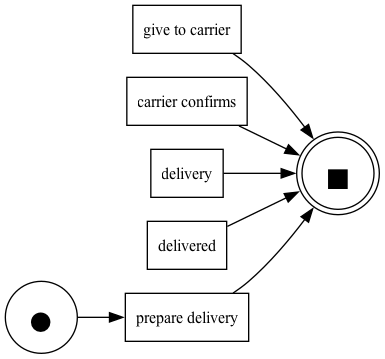

In [20]:
# Petri net with initial and final marking
pn_alpha, im_alpha, fm_alpha = pm4py.discover_petri_net_alpha(event_log_package)
pm4py.view_petri_net(pn_alpha, im_alpha, fm_alpha)

# pm4py.visualization.petri_net.variants.alignments.apply(pn, im, fm, aggregated_statistics = pm4py.statistics.variants.log.get.get_language(event_log_customer))

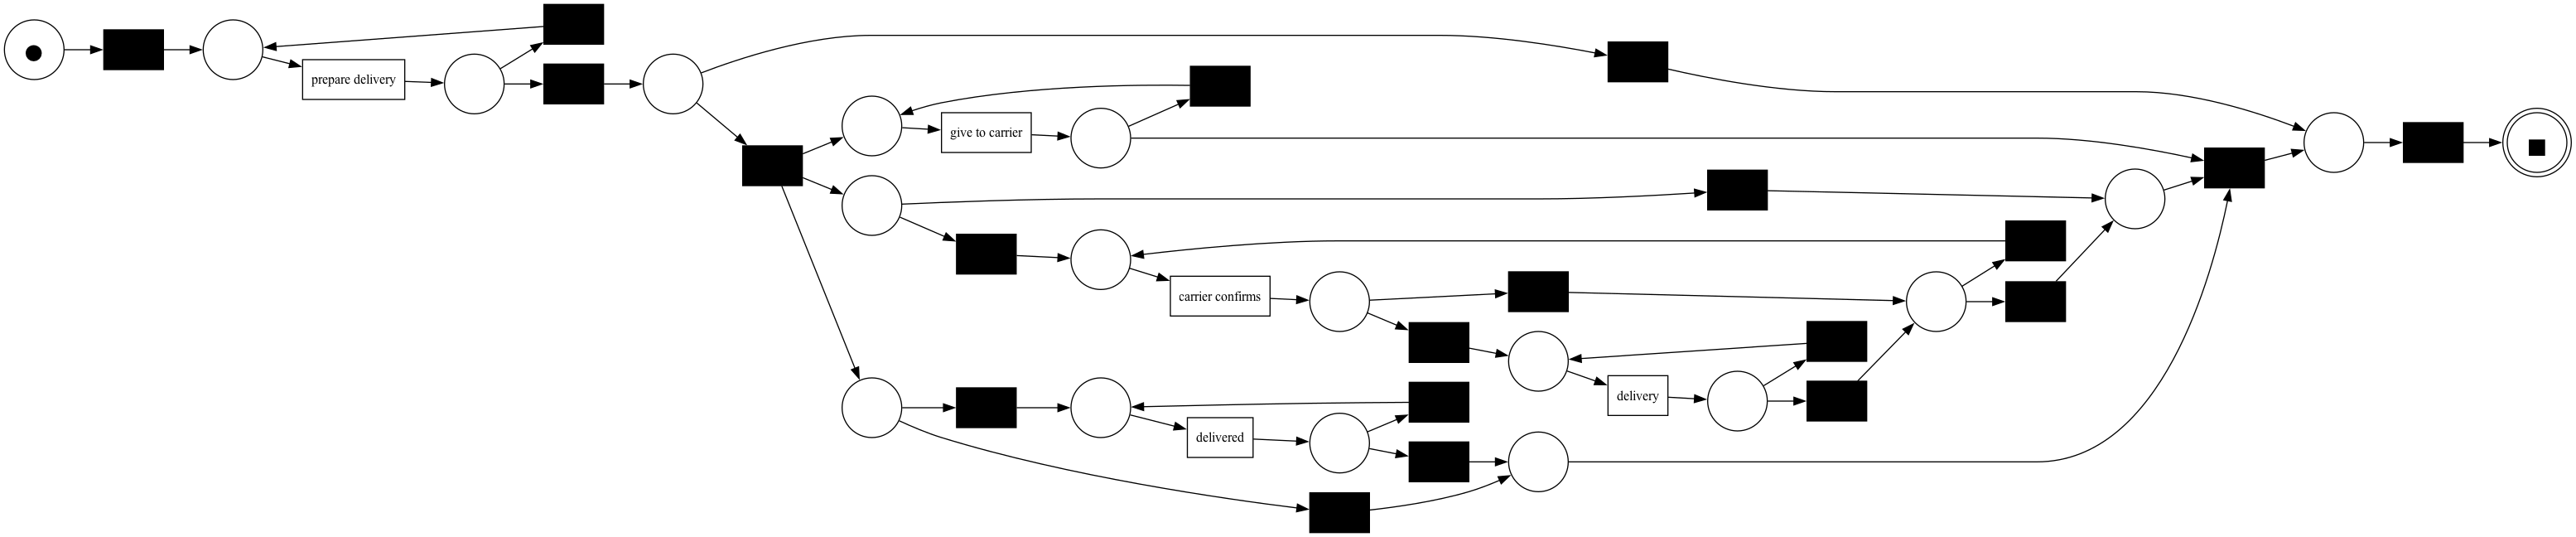

In [21]:
pn_inductive, im_inductive, fm_inductive = pm4py.discover_petri_net_inductive(event_log_package)
pm4py.view_petri_net(pn_inductive, im_inductive, fm_inductive)

---

### 8. Conformance Checking

To evaluate the discovered process models wrt. their respective event logs, different types of conformance checking can be used.

##### 8.1. Token-based replay

In the lecture, you learned how token-based replay can be applied to measure the level of conformance between the process described by the event log and the process defined by the process model. Token-based fitness is computed by replaying the event log on the process model. Accordingly, precision indicates how much behaviour is allowed by the process model, that is unlikely for the real process captured by the event log. Both measures are computed in the following for the previously discovered models.

Additionally, detailed diagnostics provide insights into the computation. For each case in the event log, the respective counters for missing tokens, consumed tokens, remained tokens, and produced tokens are shown. This may help with futher insights into the variants that can or cannot be replayed well on the process model.

In [22]:
print(pm4py.fitness_token_based_replay(event_log_package, pn_inductive, im_inductive, fm_inductive))
print(pm4py.precision_token_based_replay(event_log_package, pn_inductive, im_inductive, fm_inductive))

print(pm4py.fitness_token_based_replay(event_log_package, pn_alpha, im_alpha, fm_alpha))
print(pm4py.precision_token_based_replay(event_log_package, pn_alpha, im_alpha, fm_alpha))

pm4py.conformance_diagnostics_token_based_replay(event_log_package, pn_alpha, im_alpha, fm_alpha)

/Users/yuyang/Documents/课件/BPDI/Thesis/edx course/subtitle/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
replaying log with TBR, completed traces :: 100%|██████████| 12/12 [00:00<00:00, 1671.98it/s]


{'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}


replaying log with TBR, completed traces :: 100%|██████████| 49/49 [00:00<00:00, 1385.79it/s]


0.5145286131201624


replaying log with TBR, completed traces :: 100%|██████████| 12/12 [00:00<00:00, 4781.20it/s]


{'perc_fit_traces': 29.958391123439668, 'average_trace_fitness': 0.7753969548984643, 'log_fitness': 0.7067816644579867, 'percentage_of_fitting_traces': 29.958391123439668}


replaying log with TBR, completed traces :: 100%|██████████| 49/49 [00:00<00:00, 22404.98it/s]


0.31718880728827736


replaying log with TBR, completed traces :: 100%|██████████| 12/12 [00:00<00:00, 5061.00it/s]


[{'trace_is_fit': False,
  'trace_fitness': 0.6666666666666667,
  'activated_transitions': [(prepare delivery, 'prepare delivery'),
   (give to carrier, 'give to carrier'),
   (carrier confirms, 'carrier confirms'),
   (delivered, 'delivered'),
   (delivery, 'delivery')],
  'reached_marking': ['end:5'],
  'enabled_transitions_in_marking': {(carrier confirms, 'carrier confirms'),
   (delivered, 'delivered'),
   (delivery, 'delivery'),
   (give to carrier, 'give to carrier')},
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 2,
  'remaining_tokens': 4,
  'produced_tokens': 6},
 {'trace_is_fit': False,
  'trace_fitness': 0.6666666666666667,
  'activated_transitions': [(prepare delivery, 'prepare delivery'),
   (give to carrier, 'give to carrier'),
   (carrier confirms, 'carrier confirms'),
   (delivered, 'delivered'),
   (delivery, 'delivery')],
  'reached_marking': ['end:5'],
  'enabled_transitions_in_marking': {(carrier confirms, 'carrier confirms'),
   (de

The output above indicates that the process model generated by the inductive miner outperforms the alpha miner model in terms of token-based fitness and precision. This suggests that the inductive miner model is more suitable to capture the process behaviour from the given event log.

##### 8.2. Alignments

As an alternative to token-based replay, alignments between the cases from the event log and the traces in the petri net can be computed to obtain fitness and precision values. Additionally, the individual alignments for each case in the event log are accessible through the conformance diagnostics.

In [23]:
print(pm4py.fitness_alignments(event_log_package, pn_inductive, im_inductive, fm_inductive))
print(pm4py.precision_alignments(event_log_package, pn_inductive, im_inductive, fm_inductive))

print(pm4py.fitness_alignments(event_log_package, pn_alpha, im_alpha, fm_alpha))
print(pm4py.precision_alignments(event_log_package, pn_alpha, im_alpha, fm_alpha))

pm4py.conformance.conformance_diagnostics_alignments(event_log_package, pn_alpha, im_alpha, fm_alpha)

aligning log, completed variants :: 100%|██████████| 12/12 [00:00<00:00, 199.92it/s]


{'percFitTraces': 100.0, 'averageFitness': 1.0, 'percentage_of_fitting_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 0.9998119720415215}


computing precision with alignments, completed variants :: 100%|██████████| 49/49 [00:00<00:00, 377.06it/s]


0.5145286131201624


aligning log, completed variants :: 100%|██████████| 12/12 [00:00<00:00, 105.23it/s]


{'percFitTraces': 29.958391123439668, 'averageFitness': 0.5574513300465805, 'percentage_of_fitting_traces': 29.958391123439668, 'average_trace_fitness': 0.5574513300465805, 'log_fitness': 0.42993440667859273}


computing precision with alignments, completed variants :: 100%|██████████| 49/49 [00:00<00:00, 3480.10it/s]


0.31718880728827736


aligning log, completed variants :: 100%|██████████| 12/12 [00:00<00:00, 1025.36it/s]


[{'alignment': [('prepare delivery', 'prepare delivery'),
   ('give to carrier', '>>'),
   ('carrier confirms', '>>'),
   ('delivered', '>>'),
   ('delivery', '>>')],
  'cost': 40000,
  'visited_states': 5,
  'queued_states': 31,
  'traversed_arcs': 31,
  'lp_solved': 7,
  'fitness': 0.33333333333333337,
  'bwc': 60000},
 {'alignment': [('prepare delivery', 'prepare delivery'),
   ('give to carrier', '>>'),
   ('carrier confirms', '>>'),
   ('delivered', '>>'),
   ('delivery', '>>')],
  'cost': 40000,
  'visited_states': 5,
  'queued_states': 31,
  'traversed_arcs': 31,
  'lp_solved': 7,
  'fitness': 0.33333333333333337,
  'bwc': 60000},
 {'alignment': [('prepare delivery', 'prepare delivery'),
   ('give to carrier', '>>'),
   ('carrier confirms', '>>'),
   ('delivered', '>>'),
   ('delivery', '>>')],
  'cost': 40000,
  'visited_states': 5,
  'queued_states': 31,
  'traversed_arcs': 31,
  'lp_solved': 7,
  'fitness': 0.33333333333333337,
  'bwc': 60000},
 {'alignment': [('prepare deliv